# One Step Lookahead

In [1]:
def agent_one_step(obs, config):
    
    import random
    import numpy as np
    
    # Calculates score if agent drops piece in selected column
    def score_move(grid, col, mark, config):
        next_grid = drop_piece(grid, col, mark, config)
        score = get_heuristic(next_grid, mark, config)
        return score

    # Helper function for score_move: gets board at next step if agent drops piece in selected column
    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid

    # Helper function for score_move: calculates value of heuristic for grid
    def get_heuristic(grid, mark, config):
        A = 10**6
        B = 10**1
        C = 10**0
        D = -10**0
        E = -10**2
        num_twos = count_windows(grid, 2, mark, config)
        num_threes = count_windows(grid, 3, mark, config)
        num_fours = count_windows(grid, 4, mark, config)
        num_twos_opp = count_windows(grid, 2, mark%2+1, config)
        num_threes_opp = count_windows(grid, 3, mark%2+1, config)
        score = A*num_fours + B*num_threes + C*num_twos + D*num_twos_opp + E*num_threes_opp
        return score

    # Helper function for get_heuristic: checks if window satisfies heuristic conditions
    def check_window(window, num_discs, piece, config):
        return (window.count(piece) == num_discs and window.count(0) == config.inarow-num_discs)

    # Helper function for get_heuristic: counts number of windows satisfying specified heuristic conditions
    def count_windows(grid, num_discs, piece, config):
        num_windows = 0
        # Horizontal
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # Vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # Positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # Negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        return num_windows


    # START BEHAVIOUR
    
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Calculate scores with heuristic
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config) for col in valid_moves]))
    # Columns which maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    
    return random.choice(max_cols)

# N-Step Lookahead

In [2]:
def agent_n_step(obs, config):
    
    import random
    import numpy as np
    
    # Uses minimax to calculate value of dropping piece in selected column
    def score_move(grid, col, mark, config, nsteps):
        next_grid = drop_piece(grid, col, mark, config)
        score = minimax(next_grid, nsteps-1, False, mark, config)
        return score
    
    # Helper function for score_move: gets board at next step if agent drops piece in selected column
    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid
    
    # Helper function for minimax: calculates value of heuristic for grid
    def get_heuristic(grid, mark, config):
        A = 10**6
        B = 10**1
        C = 10**0
        D = -10**0
        E = -10**2
        F = -10**4
        num_twos = count_windows(grid, 2, mark, config)
        num_threes = count_windows(grid, 3, mark, config)
        num_fours = count_windows(grid, 4, mark, config)
        num_twos_opp = count_windows(grid, 2, mark%2+1, config)
        num_threes_opp = count_windows(grid, 3, mark%2+1, config)
        num_fours_opp = count_windows(grid, 4, mark%2+1, config)
        score = A*num_fours + B*num_threes + C*num_twos + D*num_twos_opp + E*num_threes_opp + F*num_fours_opp
        return score

    def check_window(window, num_discs, piece, config):
        return (window.count(piece) == num_discs and window.count(0) == config.inarow-num_discs)

    # Helper function for get_heuristic: counts number of windows satisfying specified heuristic conditions
    def count_windows(grid, num_discs, piece, config):
        num_windows = 0
        # horizontal
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        return num_windows
    
    # Helper function for minimax: checks if agent or opponent has four in a row in the window
    def is_terminal_window(window, config):
        return window.count(1) == config.inarow or window.count(2) == config.inarow

    # Helper function for minimax: checks if game has ended
    def is_terminal_node(grid, config):
        # Check for draw 
        if list(grid[0, :]).count(0) == 0:
            return True
        # Check for win: horizontal, vertical, or diagonal
        # horizontal 
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if is_terminal_window(window, config):
                    return True
        # vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if is_terminal_window(window, config):
                    return True
        # positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if is_terminal_window(window, config):
                    return True
        # negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if is_terminal_window(window, config):
                    return True
        return False

    # Minimax implementation
    def minimax(node, depth, maximizingPlayer, mark, config, alpha=-np.Inf, beta=np.Inf):
        is_terminal = is_terminal_node(node, config)
        valid_moves = [c for c in range(config.columns) if node[0][c] == 0]
        if depth == 0 or is_terminal:
            return get_heuristic(node, mark, config)
        if maximizingPlayer:
            value = -np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark, config)
                value = max(value, minimax(child, depth-1, False, mark, config, alpha, beta))
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return value
        else:
            value = np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark%2+1, config)
                value = min(value, minimax(child, depth-1, True, mark, config, alpha, beta))
                beta = min(beta,value)
                if beta <= alpha:
                    break
            return value


    # START BEHAVIOUR
    
    N_STEPS = 3
       
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Calculate scores with heuristic
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config, N_STEPS) for col in valid_moves]))
    # Columns which maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    
    return random.choice(max_cols)

# Deep Reinforcement Learning

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install 'tensorflow==1.15.0'

import tensorflow as tf
from kaggle_environments import make, evaluate
from gym import spaces

!apt-get update
!apt-get install -y cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install "stable-baselines[mpi]==2.9.0"

from stable_baselines.bench import Monitor 
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO1, A2C
from stable_baselines.a2c.utils import conv, linear, conv_to_fc
from stable_baselines.common.policies import CnnPolicy


class ConnectFourGym:
    def __init__(self, agent2="random"):
        ks_env = make("connectx", debug=True)
        self.env = ks_env.train([None, agent2])
        self.rows = ks_env.configuration.rows
        self.columns = ks_env.configuration.columns
        
        self.action_space = spaces.Discrete(self.columns)
        self.observation_space = spaces.Box(low=0, high=2, 
                                            shape=(self.rows,self.columns,1), dtype=np.int)
        
        # Tuple corresponding to the min and max possible rewards
        self.reward_range = (-10, 1)
        # StableBaselines throws error if these are not defined
        self.spec = None
        self.metadata = None
        
    def reset(self):
        self.obs = self.env.reset()
        return np.array(self.obs['board']).reshape(self.rows,self.columns,1)
    
    def change_reward(self, old_reward, done):
        if old_reward == 1:
            # The agent won
            return 1
        elif done:
            # The opponent won
            return -1
        else:
            # Reward 1/42
            return 1/(self.rows*self.columns)
        
    def step(self, action):
        # Check if agent's move is valid
        is_valid = (self.obs['board'][int(action)] == 0)
        if is_valid: # Play the move
            self.obs, old_reward, done, _ = self.env.step(int(action))
            reward = self.change_reward(old_reward, done)
        else: # End the game and penalize agent
            reward, done, _ = -10, True, {}
        return np.array(self.obs['board']).reshape(self.rows,self.columns,1), reward, done, _
    
# Create ConnectFour environment
env = ConnectFourGym(agent2="random")

# Create directory for logging training information
log_dir = "log/"
os.makedirs(log_dir, exist_ok=True)

# Logging progress
monitor_env = Monitor(env, log_dir, allow_early_resets=True)

# Create a vectorized environment
vec_env = DummyVecEnv([lambda: monitor_env])

def modified_cnn(scaled_images, **kwargs):
    activ = tf.nn.relu
    layer_1 = activ(conv(scaled_images, 'conv1', n_filters=32, filter_size=3, stride=1, 
                         init_scale=np.sqrt(2), **kwargs))
    layer_2 = activ(conv(layer_1, 'conv2', n_filters=64, filter_size=3, stride=1, 
                         init_scale=np.sqrt(2), **kwargs))
    layer_2 = conv_to_fc(layer_2)
    return activ(linear(layer_2, 'dense1', n_hidden=512, init_scale=np.sqrt(2)))  

class CustomCnnPolicy(CnnPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomCnnPolicy, self).__init__(*args, **kwargs, cnn_extractor=modified_cnn)

     |████████████████████████████████| 412.3 MB 21 kB/s s eta 0:00:01     |█████▊                          | 74.1 MB 44.9 MB/s eta 0:00:08     |██████                          | 76.6 MB 44.9 MB/s eta 0:00:08     |██████▎                         | 80.9 MB 30.3 MB/s eta 0:00:11     |██████▍                         | 82.2 MB 30.3 MB/s eta 0:00:11     |███████████████████▌            | 251.9 MB 18.7 MB/s eta 0:00:09     |███████████████████▋            | 252.6 MB 18.7 MB/s eta 0:00:09     |█████████████████████████▏      | 323.7 MB 31.4 MB/s eta 0:00:03     |██████████████████████████▍     | 340.7 MB 23.7 MB/s eta 0:00:04��██▋     | 343.4 MB 23.7 MB/s eta 0:00:03
     |████████████████████████████████| 50 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 24.4 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=7a622dbcd427948195f9fd84590a999d22db26091e9e6

     |████████████████████████████████| 1.4 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 7.3 MB/s eta 0:00:01
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2088498 sha256=fec306b91eaab0cd5b6964e817f0e031b5f5fb1648385cbbcc0e607940969235
  Stored in directory: /root/.cache/pip/wheels/da/37/ee/8d5c9166a378bb0b661bf4257b8e1ef8d79d879b931534fb98
Successfully built mpi4py


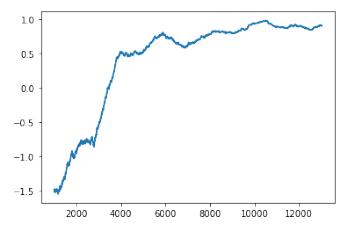

In [3]:
model_PPO1 = PPO1(CustomCnnPolicy, vec_env, verbose=0)

model_PPO1.learn(total_timesteps=100000)

# Plot reward
with open(os.path.join(log_dir, "monitor.csv"), 'rt') as fh:    
    firstline = fh.readline()
    assert firstline[0] == '#'
    df = pd.read_csv(fh, index_col=None)['r']
df.rolling(window=1000).mean().plot()
plt.show()

model_PPO1.save("model_PPO1")

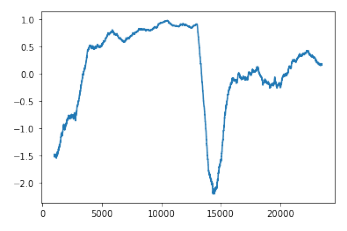

In [4]:
model_A2C = A2C(CustomCnnPolicy, vec_env, verbose=0)

model_A2C.learn(total_timesteps=100000)

# Plot cumulative reward
with open(os.path.join(log_dir, "monitor.csv"), 'rt') as fh:    
    firstline = fh.readline()
    assert firstline[0] == '#'
    df = pd.read_csv(fh, index_col=None)['r']
df.rolling(window=1000).mean().plot()
plt.show()

model_A2C.save("model_A2C")

In [8]:
def agent_PP0(obs, config):
    import random
    import numpy as np
    !apt-get update
    !apt-get install -y cmake libopenmpi-dev python3-dev zlib1g-dev
    !pip install "stable-baselines[mpi]==2.9.0"
    from stable_baselines import PPO1, A2C

    agent = PPO1.load("model_PPO1")
    col, _ = agent.predict(np.array(obs['board']).reshape(6,7,1))
    
    # Check if selected column is valid
    is_valid = (obs['board'][int(col)] == 0)
    # If not valid, select random move. 
    if is_valid:
        return int(col)
    else:
        return random.choice([col for col in range(config.columns) if obs.board[int(col)] == 0])

In [9]:
def agent_A2C(obs, config):
    import random
    import numpy as np
    !apt-get update
    !apt-get install -y cmake libopenmpi-dev python3-dev zlib1g-dev
    !pip install "stable-baselines[mpi]==2.9.0"
    from stable_baselines import PPO1, A2C
    
    agent = A2C.load("model_A2C")
    col, _ = agent.predict(np.array(obs['board']).reshape(6,7,1))
    
    # Check if selected column is valid
    is_valid = (obs['board'][int(col)] == 0)
    # If not valid, select random move. 
    if is_valid:
        return int(col)
    else:
        return random.choice([col for col in range(config.columns) if obs.board[int(col)] == 0])

In [11]:
from kaggle_environments import agent as kaggle_agent
from kaggle_environments import utils, make

env = make("connectx", debug=True)
env.run([agent_A2C, agent_PPO])
# Show the game
env.render(mode="ipython")